In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("../Dataset/Space_Corrected.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


1.Data Preparation

In [4]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [5]:
df = df.rename( columns = {'Detail' : 'Rocket'})

In [6]:
df = df.rename( columns = {' Rocket' : 'Price'})

In [7]:
df = df.rename( columns = {'Status Rocket' : 'Status_Rocket'})

In [8]:
df = df.rename( columns = {'Company Name' : 'Company_Name'})

In [9]:
df = df.rename( columns = {'Status Mission' : 'Status_Mission'})

In [10]:
df = df.drop('Unnamed: 0.1',axis=1)

In [11]:
df.Datum = df.Datum.astype('datetime64[ns, UTC]')

In [12]:
df['Year'] = df['Datum'].dt.year
df['Month'] = df['Datum'].dt.month

In [13]:
df

,Unnamed: 0,Company_Name,Location,Datum,Rocket,Status_Rocket,Price,Status_Mission,Year,Month
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,8
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,7
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,7
...,...,...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,2
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,2
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,12
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,11


In [14]:
df.Price  = df.Price.fillna(0)

In [15]:
df.isnull().sum()

Unnamed: 0        0
Company_Name      0
Location          0
Datum             0
Rocket            0
Status_Rocket     0
Price             0
Status_Mission    0
Year              0
Month             0
dtype: int64

In [16]:
df.dtypes

Unnamed: 0                      int64
Company_Name                   object
Location                       object
Datum             datetime64[ns, UTC]
Rocket                         object
Status_Rocket                  object
Price                          object
Status_Mission                 object
Year                            int32
Month                           int32
dtype: object

In [17]:
df.Price.unique()

array(['50.0 ', '29.75 ', 0, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [18]:
df.Datum.unique()

<DatetimeArray>
['2020-08-07 05:12:00+00:00', '2020-08-06 04:01:00+00:00',
 '2020-08-04 23:57:00+00:00', '2020-07-30 21:25:00+00:00',
 '2020-07-30 11:50:00+00:00', '2020-07-25 03:13:00+00:00',
 '2020-07-23 14:26:00+00:00', '2020-07-23 04:41:00+00:00',
 '2020-07-20 21:30:00+00:00', '2020-07-19 21:58:00+00:00',
 ...
 '1958-04-28 02:53:00+00:00', '1958-04-27 09:01:00+00:00',
 '1958-03-26 17:38:00+00:00', '1958-03-17 12:15:00+00:00',
 '1958-03-05 18:27:00+00:00', '1958-02-05 07:33:00+00:00',
 '1958-02-01 03:48:00+00:00', '1957-12-06 16:44:00+00:00',
 '1957-11-03 02:30:00+00:00', '1957-10-04 19:28:00+00:00']
Length: 4319, dtype: datetime64[ns, UTC]

In [19]:
df.Price = df.Price.replace('[,]','',regex=True).astype('float64')

In [20]:
df.dtypes

Unnamed: 0                      int64
Company_Name                   object
Location                       object
Datum             datetime64[ns, UTC]
Rocket                         object
Status_Rocket                  object
Price                         float64
Status_Mission                 object
Year                            int32
Month                           int32
dtype: object

2.Exploratory Data Analysis(EDA)

In [21]:
df.describe()

,Unnamed: 0,Price,Year,Month
count,4324.000000,4324.000000,4324.000000,4324.000000
mean,2161.500000,34.286698,1987.386679,6.754163
std,1248.375611,150.442829,18.072562,3.417027
min,0.000000,0.000000,1957.000000,1.000000
25%,1080.750000,0.000000,1972.000000,4.000000
50%,2161.500000,0.000000,1984.000000,7.000000
75%,3242.250000,0.000000,2002.000000,10.000000
max,4323.000000,5000.000000,2020.000000,12.000000


In [22]:
df['Company_Name'].value_counts()

Company_Name
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

In [23]:
df['Location'].value_counts()

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: count, Length: 137, dtype: int64

In [24]:
df['Rocket'].value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Lambda-IV S | Osumi                    5
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Proton K/Block D | Zond                4
                                      ..
Ariane 44P | Intelsat 709              1
Ariane 5 G | Cluster                   1
Delta II 7925 | Galaxy 9               1
Space Shuttle Endeavour | STS-77       1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

In [25]:
df['Status_Rocket'].value_counts()

Status_Rocket
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [26]:
df['Status_Mission'].value_counts()

Status_Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

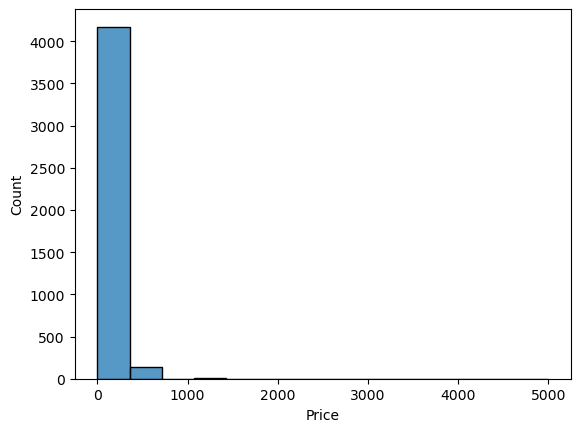

In [27]:
sb.histplot(df.Price)
plt.show()

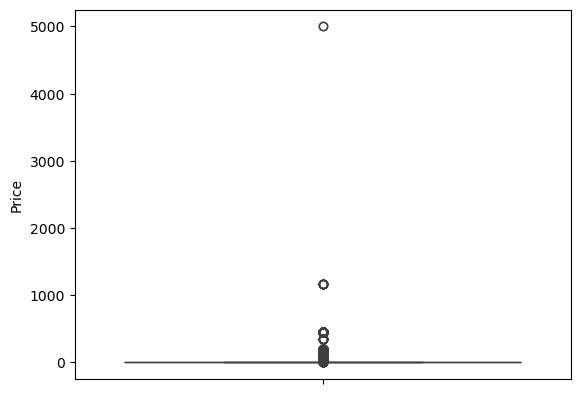

In [28]:
sb.boxplot(df.Price)
plt.xticks(rotation=90)
plt.show()

3.Top Agencies Analysis

In [29]:
df['Company_Name'].value_counts().nlargest(10)

Company_Name
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

In [30]:
df[df['Status_Mission']=='Success'].groupby('Company_Name').size().nlargest(20)

Company_Name
RVSN USSR           1614
Arianespace          269
CASC                 231
General Dynamics     203
VKS RF               188
NASA                 186
ULA                  139
Boeing               131
US Air Force         129
Martin Marietta      100
SpaceX                94
MHI                   80
Lockheed              74
Northrop              74
ISRO                  63
Roscosmos             51
ILS                   45
Sea Launch            33
ISAS                  26
Kosmotras             21
dtype: int64

4.Launch Site Analysis

In [31]:
df['Location'].value_counts()

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: count, Length: 137, dtype: int64

In [32]:
df[df['Status_Mission']=='Success'].groupby('Location').size().nlargest(20)

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan           220
Site 132/1, Plesetsk Cosmodrome, Russia              203
Site 43/4, Plesetsk Cosmodrome, Russia               190
Site 41/1, Plesetsk Cosmodrome, Russia               186
Site 132/2, Plesetsk Cosmodrome, Russia              164
Site 1/5, Baikonur Cosmodrome, Kazakhstan            155
Site 133/3, Plesetsk Cosmodrome, Russia              147
Site 43/3, Plesetsk Cosmodrome, Russia               131
LC-39A, Kennedy Space Center, Florida, USA           117
ELA-2, Guiana Space Centre, French Guiana, France    115
ELA-3, Guiana Space Centre, French Guiana, France    104
SLC-40, Cape Canaveral AFS, Florida, USA             101
SLC-41, Cape Canaveral AFS, Florida, USA              91
SLC-4W, Vandenberg AFB, California, USA               87
SLC-4E, Vandenberg AFB, California, USA               78
SLC-17A, Cape Canaveral AFS, Florida, USA             74
LA-Y1, Tanegashima Space Center, Japan                69
Site 90/20, Baikonur C

5.Rocket and Status Analysis

In [33]:
df['Rocket'].value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Lambda-IV S | Osumi                    5
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Proton K/Block D | Zond                4
                                      ..
Ariane 44P | Intelsat 709              1
Ariane 5 G | Cluster                   1
Delta II 7925 | Galaxy 9               1
Space Shuttle Endeavour | STS-77       1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

In [34]:
a=df.groupby('Rocket')['Price'].mean()*100
a

Rocket
ASLV | SROSS C                   0.0
ASLV | SROSS C2                  0.0
ASLV | SROSS-A                   0.0
ASLV | SROSS-B                   0.0
Angara 1.2 | Demo Flight         0.0
                                ... 
Zenit-3 SLBF | AngoSat-1         0.0
Zenit-3 SLBF | Elektro-L n†­1    0.0
Zenit-3 SLBF | Elektro-L n†­2    0.0
Zenit-3 SLBF | Spektr-R          0.0
ZhuQue-1 | CCTV Future-1         0.0
Name: Price, Length: 4278, dtype: float64

In [36]:
a

,Unnamed: 0,Company_Name,Location,Datum,Rocket,Status_Rocket,Price,Status_Mission,Year,Month
1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15 03:00:00+00:00,Energiya/Buran | Buran,StatusRetired,5000.0,Success,1988,11
2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,Energiya/Polyus | Polyus Space Station,StatusRetired,5000.0,Success,1987,5
3149,3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1973-05-14 17:30:00+00:00,Saturn V | Skylab 1,StatusRetired,1160.0,Success,1973,5
3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-12-19 19:24:00+00:00,Saturn V | Apollo 17,StatusRetired,1160.0,Success,1972,12
3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-04-16 17:54:00+00:00,Saturn V | Apollo 16,StatusRetired,1160.0,Success,1972,4
3328,3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26 13:34:00+00:00,Saturn V | Apollo 15,StatusRetired,1160.0,Success,1971,7
3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31 21:03:00+00:00,Saturn V | Apollo 14,StatusRetired,1160.0,Success,1971,1
3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11 19:13:00+00:00,Saturn V | Apollo 13,StatusRetired,1160.0,Success,1970,4
3511,3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14 16:22:00+00:00,Saturn V | Apollo 12,StatusRetired,1160.0,Success,1969,11
3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16 13:32:00+00:00,Saturn V | Apollo 11,StatusRetired,1160.0,Success,1969,7


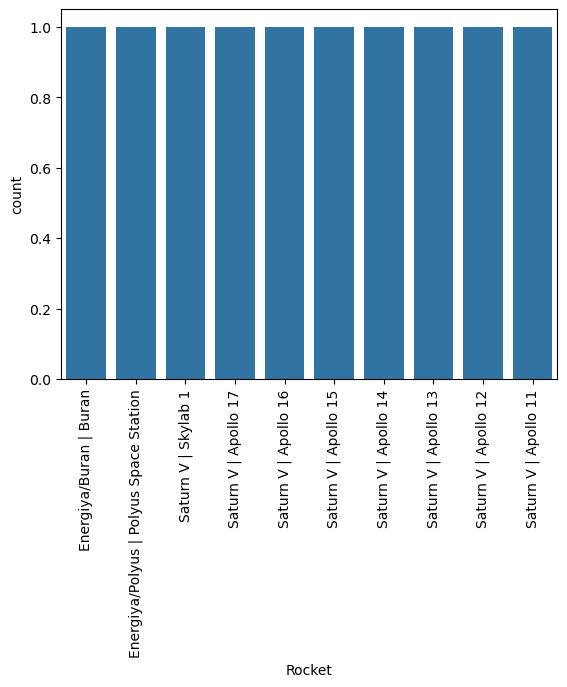

In [37]:
a = df.nlargest(10,'Price')
sb.countplot(x=a.Rocket)
plt.xticks(rotation=90)
plt.show()

In [38]:
df['Status_Rocket'].value_counts()

Status_Rocket
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

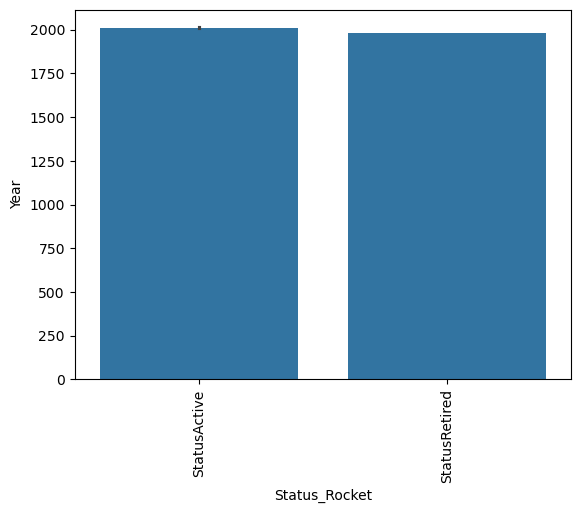

In [39]:
sb.barplot(x=df.Status_Rocket, y=df.Year)
plt.xticks(rotation=90)
plt.show()

6.Cost Analysis

In [40]:
df[['Company_Name','Price']].groupby('Company_Name').mean()

,Price
Company_Name,
AEB,0.000000
AMBA,0.000000
ASI,0.000000
Arianespace,58.584229
Arm??e de l'Air,0.000000
Blue Origin,0.000000
Boeing,9.125000
CASC,25.260000
CASIC,0.000000


In [41]:
df[df['Status_Mission'] == 'Success'].groupby('Rocket')['Price'].mean()

Rocket
ASLV | SROSS C2                    0.0
Angara 1.2 | Demo Flight           0.0
Angara A5/Briz-M | Demo Flight     0.0
Antares 110 | Antares A-ONE       80.0
Antares 110 | CRS Orb-D1          80.0
                                  ... 
Zenit-3 SLB | Telstar-11N          0.0
Zenit-3 SLBF | AngoSat-1           0.0
Zenit-3 SLBF | Elektro-L n†­1      0.0
Zenit-3 SLBF | Elektro-L n†­2      0.0
Zenit-3 SLBF | Spektr-R            0.0
Name: Price, Length: 3846, dtype: float64

7.Temporal Analysis

In [42]:
df['Year'].value_counts().sort_index()

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: count, Length: 64, dtype: int64

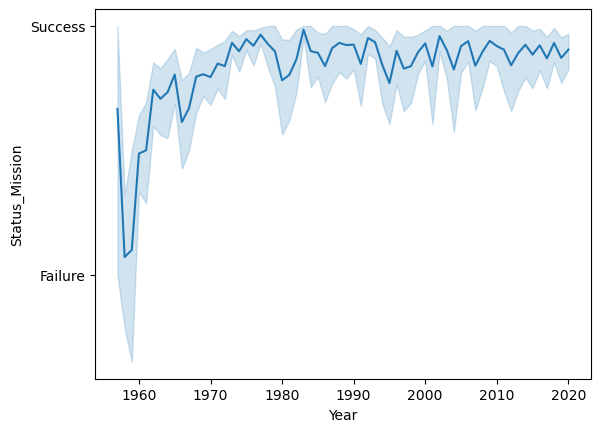

In [43]:
sb.lineplot(x=df.Year,y=df.Status_Mission)
plt.show()

In [44]:
df.groupby('Year')['Status_Mission'].size()

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Status_Mission, Length: 64, dtype: int64

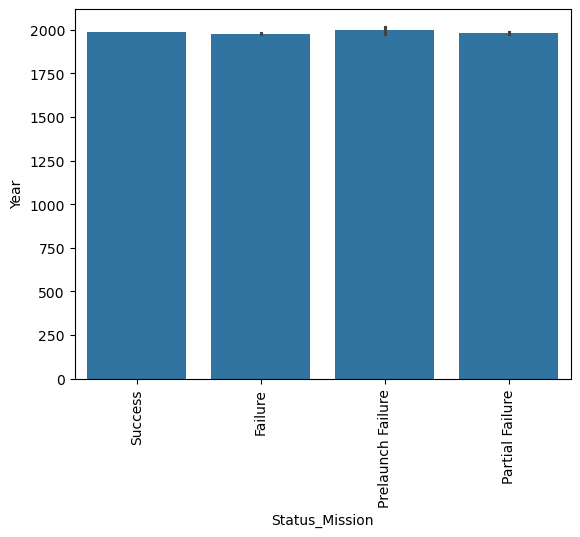

In [45]:
sb.barplot(x=df.Status_Mission, y=df.Year)
plt.xticks(rotation=90)
plt.show()